In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import   PercentFormatter
from matplotlib.ticker import FuncFormatter
import ast
import seaborn as sns
from datasets import load_dataset
from adjustText import adjust_text

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [2]:
df_filter = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].dropna(subset='salary_year_avg')

In [3]:
df_skills = df_filter.explode('job_skills')

In [9]:
df_skills.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,python,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,sql,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,aws,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,azure,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,excel,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."


In [4]:
df_group = df_skills.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)
df_group = df_group.rename(columns={'count': 'skill_count','median': 'median_salary' })
df_da_count = len(df_filter)
df_group['skill_percent'] = df_group['skill_count']/df_da_count*100
df_group

,skill_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.0,48.936170
excel,39,98500.0,41.489362
python,36,96050.0,38.297872
tableau,20,108087.5,21.276596
r,18,79200.0,19.148936
...,...,...,...
unify,1,79200.0,1.063830
unreal,1,105650.0,1.063830
visio,1,119250.0,1.063830


In [5]:

skill_percent = 11.7
skill_demand = df_group[df_group['skill_percent'] > skill_percent]
skill_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.0,48.936170
excel,39,98500.0,41.489362
python,36,96050.0,38.297872
tableau,20,108087.5,21.276596
r,18,79200.0,19.148936
power bi,17,111175.0,18.085106
azure,15,93600.0,15.957447
aws,12,79200.0,12.765957
oracle,11,79200.0,11.702128


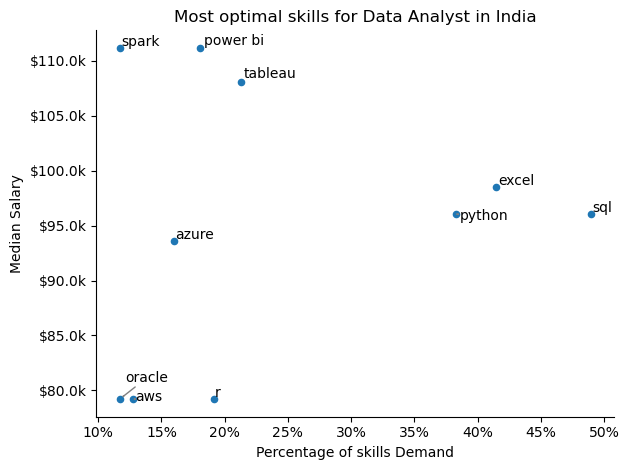

In [14]:
skill_demand.plot(kind='scatter', x='skill_percent', y='median_salary')
texts = []
for x,txt in enumerate(skill_demand.index):
    texts.append(plt.text(skill_demand['skill_percent'].iloc[x], skill_demand['median_salary'].iloc[x], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray',))
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.title('Most optimal skills for Data Analyst in India')
plt.ylabel('Median Salary')
plt.xlabel('Percentage of skills Demand')
plt.tight_layout()
sns.despine()

In [13]:
df["job_type_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(str(x)))
